In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('customer_behavior_unsupervised.csv')

## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  500 non-null    float64
 1   feature_1  500 non-null    float64
 2   feature_2  500 non-null    float64
 3   feature_3  500 non-null    float64
 4   feature_4  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [5]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-1.248325,-1.137174,0.277968,0.702952,1.374166
1,-1.241003,0.720804,0.944749,-1.672147,-0.695038
2,-0.859728,0.955295,0.742522,-1.416056,-0.820891
3,-0.546781,1.198398,0.489929,-1.692133,-0.573161
4,1.091959,0.905112,0.064361,1.088081,-0.892193
...,...,...,...,...,...
495,-1.717106,0.772110,0.117375,-1.134905,-0.795564
496,-0.775524,0.864913,0.670800,-1.384047,-0.524277
497,-1.168657,0.963444,0.422672,-1.461787,-0.579008
498,-0.264773,-1.262000,1.305169,0.567142,1.698487


In [6]:
#checking if the values are already standardized
for i in data.columns:
    print(f'{i}: {data[i].mean()}')
    print(f'{i} std: {data[i].std()}')
    print('=========================')
#checked for all the features and they all gave std approx = 1 but the mean wasn't 0 so I'll standardize it

feature_0: -2.3447910280083307e-16
feature_0 std: 1.0010015025043828
feature_1: -1.3145040611561853e-16
feature_1 std: 1.001001502504383
feature_2: 5.684341886080802e-16
feature_2 std: 1.0010015025043828
feature_3: -1.8829382497642654e-16
feature_3 std: 1.0010015025043835
feature_4: -2.877698079828406e-16
feature_4 std: 1.0010015025043828


## Feature Selection 

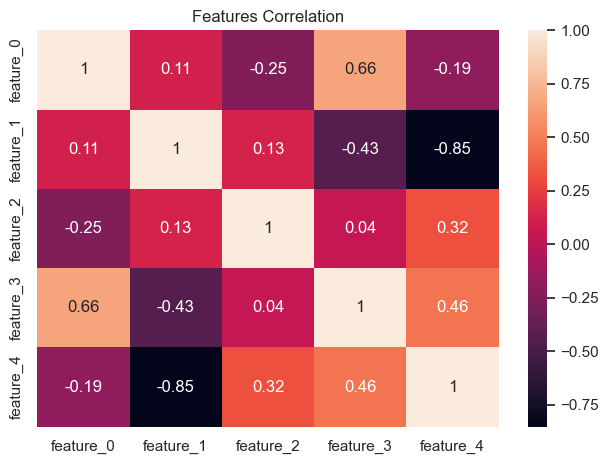

In [8]:
#we can also check feature correlation since we have 5 features we can simplify them to less features(highly correlated ones)
data.corr()
sns.heatmap(data.corr(),cmap='rocket', annot = True)
plt.title('Features Correlation')
plt.tight_layout()
plt.show()

In [9]:
# we notice that feature 0 and feature 3 are the highest correlated features and it would be better if we choose to work with them instead of the whole ds

In [10]:
selected = data[['feature_0','feature_3']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled=scaled.fit_transform(selected)

## Unsupervised Clustering

In [13]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.1,min_samples=2)

In [14]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled.shape[1])
    dbscan.fit(scaled)    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1 ) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

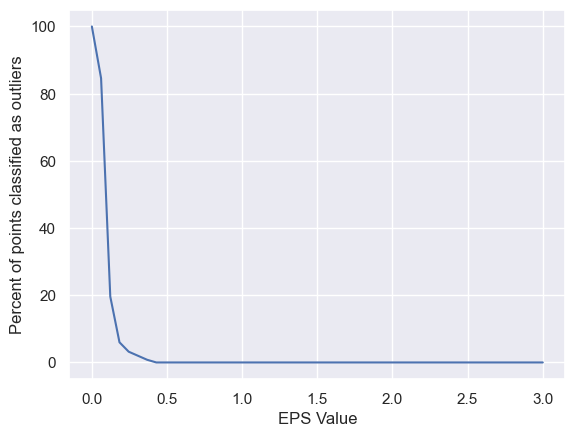

In [15]:
sns.lineplot(x=np.linspace(0.001,3,50)   ,y=outlier_percent)
plt.ylabel('Percent of points classified as outliers')
plt.xlabel('EPS Value')
plt.show()

In [16]:
labels = model.fit_predict(scaled)
labels

array([-1,  0,  0,  1,  2,  0, -1, -1,  3,  4,  5,  6,  7,  8,  9, -1, 10,
        7,  3, 11,  4,  4,  0, -1, -1, -1,  7,  5,  4, 12, -1, 13,  0, 11,
        4,  2,  5, 14, 10,  7, 10, 15, 16, -1, 17, 13, 18, 10, 19,  7, 20,
        6, 21, 10, -1, 10, 22,  9, -1,  4, 17,  0, 12, 16, 13,  5, -1, 23,
       -1, 15,  4, -1, 24, -1,  0,  4,  1, -1,  0, 23,  4, 14,  0,  4,  4,
       15, -1,  0, -1, 15,  0, 25,  5, 16, 16,  5,  5,  3,  0, 26, -1, 24,
       17,  0, 26, 16, 27, 13, 28, 12,  0, 20, -1, -1,  0, 29, 30, 13, -1,
       16,  4, 31, 32, 33, 34,  0,  0, 10,  7, 35, 13,  4, 16,  2,  4,  4,
        5, 10,  5, -1, -1,  5, -1,  5, 36, 37, -1, 16,  4, -1, -1, 38, -1,
       14,  4,  4,  0,  7,  5,  0, -1,  3,  8,  4,  0, 10,  4,  4, 10,  4,
       -1,  0, 15, 16, 39,  7, 40,  4, 41,  9,  4, 16,  2, 39, 16,  4,  0,
        5,  5, 16,  2, 16,  3, 10,  0, 42, -1, 24,  5, 43, 44, 37, -1,  3,
        3, 16, 20, -1, 10,  4, 16,  3,  4,  0,  0, 22, 10,  9, -1,  3, 42,
        0,  0, 32,  4, 25

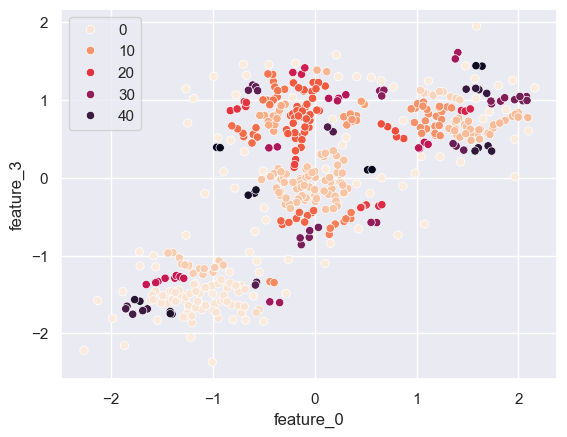

In [17]:
sns.scatterplot(data=selected, x='feature_0',y='feature_3', hue=labels, palette='rocket_r')
plt.show()

In [18]:
selected['Target']=labels
data['Target']=labels


In [19]:
selected

,feature_0,feature_3,Target
0,-1.248325,0.702952,-1
1,-1.241003,-1.672147,0
2,-0.859728,-1.416056,0
3,-0.546781,-1.692133,1
4,1.091959,1.088081,2
...,...,...,...
495,-1.717106,-1.134905,-1
496,-0.775524,-1.384047,0
497,-1.168657,-1.461787,0
498,-0.264773,0.567142,16


## Classification Model

In [20]:
X=selected.iloc[:,:6].values #if the limit of columns was higher than the columns available in the dataset it repeats the columns i.e resampling
y=selected.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8, random_state=42)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


0.95

In [ ]:
#checking for class imbalance 
selected['Target'].value_counts()

## Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

1.0


In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

3.950647163414839e-15


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_cls = data.drop("Target", axis=1)
y_cls = data["Target"]

clf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(clf, X_cls, y_cls, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", cv_scores.mean())

Random Forest CV Accuracy: 0.724


In [32]:
# cross-validation gave lower accuracy because it splits the dataset into 5 folds
# Trains the model 5 times, each time using a different fold as the test set
# Returns the average accuracy across all folds
# more meaningful and logical

# Visualizing the Clusters

In [35]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
sc=scaled.fit_transform(data)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sc)
pc_data = pca.transform(sc)

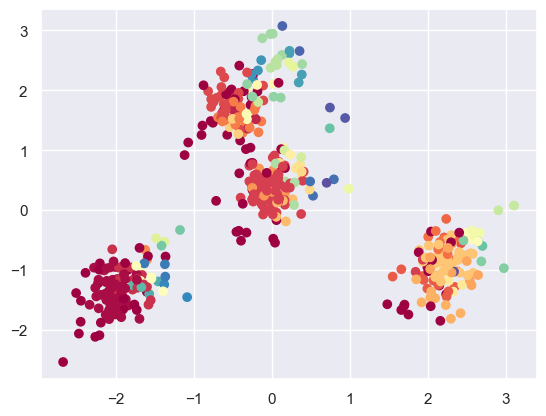

In [46]:
plt.scatter(pc_data[:,0],pc_data[:,1],c=labels, cmap='Spectral')
plt.show()

In [47]:
# the three clusters are well-separated meaning that the algorithm was able to identify different patterns

In [48]:
# non-technical:
# Each group represents users that share very similar characteristics
# All the groups are clearly distinct from one another:representing different types of users
# The data forms meaningful and separate categories of users

# THANK YOU!!